# Machine Learning
### Textbook is available @ [https://www.github.com/a-mhamdi/mlpy](https://www.github.com/a-mhamdi/mlpy)
---

### Multiple Linear Regression

Multiple linear regression is a type of regression analysis in which the relationship between the dependent variable and one or more independent variables is modeled using a linear equation. Multiple linear regression is used when there are multiple independent variables that might have an effect on the dependent variable.

In multiple linear regression, the goal is to find the linear equation that best explains the relationship between the dependent variable and the independent variables. The equation takes the form:

$$y \;=\; \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_n x_n$$

where $y$ is the dependent variable, $x_1$, $x_2$, ..., $x_n$ are the independent variables, and $\theta_0$, $\theta_1$, $\theta_2$, ..., $\theta_n$ are the coefficients that represent the influence of each variable on the dependent variable. The coefficients are estimated using the data, and the resulting equation is used to make predictions on new data.

**Importing the libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Show plots in an interactive format, e.g., zooming, saving, etc
%matplotlib notebook

In [3]:
plt.style.use("ggplot")

**Importing the dataset**

In [4]:
df = pd.read_csv("./datasets/50_Startups.csv")

In [5]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


Extract features $X$ and target $y$ from the dataset. **Profit** is the dependant variable.

In [8]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

Check the first five observations within $X$

In [9]:
print(X[:5])

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']]


Check the corresponding first five values from **Profit** column.

In [10]:
print(y[:5])

[192261.83 191792.06 191050.39 182901.99 166187.94]


**Encoding categorical data**

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [12]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [13]:
print(X[:5])

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]]


**Splitting the dataset into training set and test set**

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

**Training the multiple linear regression model on the training set**

In [16]:
from sklearn.linear_model import LinearRegression

This code will create a linear regression model that fits a line to the training data, in order to make future predictions on the test data. 

In [17]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

**Making predictions using the $X$ test set**

In [18]:
y_pred = lr.predict(X_test)

**Comparison**

<IPython.core.display.Javascript object>


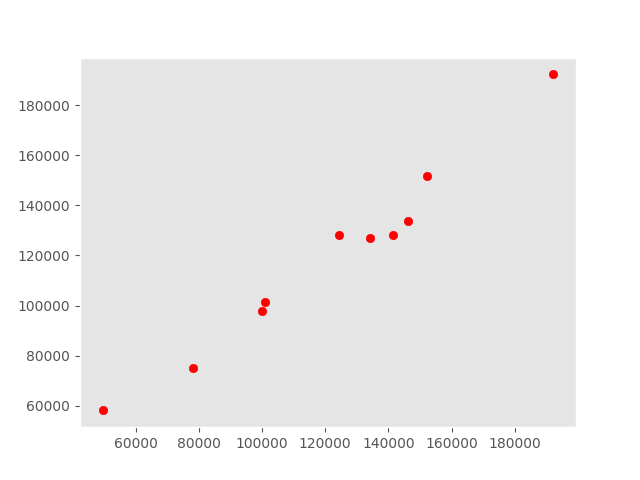

In [19]:
plt.scatter(y_test, y_pred, c="red") # GET AN INSIGHT ABOUT RELATIONSHIP BETWEEN Y_TEST AND Y_PRED
plt.grid()

Multiple linear regression can be used to understand the relationship between multiple independent variables and a single dependent variable, and can be used to make predictions about the dependent variable given new data. However, it's important to note that the independent variables must be linearly related to the dependent variable in order for multiple linear regression to be appropriate. If the relationship is non-linear, you may need to use a different type of regression analysis such as polynomial regression.